In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

from skimage.measure import label, regionprops, regionprops_table
import os
import imutils
import pandas as pd
from skimage.transform import warp_polar, rotate
# np.set_printoptions(threshold=sys.maxsize)

print(cv2.__version__)

4.5.1


In [2]:
file_names = os.listdir("images")
file_names = ["images\{}".format(name) for name in file_names]

cb_images =list()
cropped_images= list()
original_images = list()
for file_name in file_names:
    image = cv2.imread(file_name)
    cropped_image= image[40:550,130:650]
    cropped_image[0:30,0:30]= 0
    cropped_images.append(cropped_image.copy())
    blurred_image = cv2.GaussianBlur(cropped_image,(9,9),0)
    cb_images.append(blurred_image)
    

def show_image(image):
    plt.imshow(image)
    plt.show()
 

In [3]:
from skimage.transform import hough_ellipse

def find_best_circle(img):
    circles = cv2.HoughCircles(cv2.cvtColor(img,cv2.COLOR_BGR2GRAY), cv2.HOUGH_GRADIENT,1.50,minDist=190,
                                    param1=20,param2=100,minRadius=230,maxRadius=250)
    # print("center has coordinate ({},{})".format(x_center,y_center))

    edges = cv2.Canny(img,100,200)
    # ellipses = hough_ellipse (edges,threshold=8)
    # print("found {} ellipses".format(len(ellipses)))
    # for (accumulator, yc, xc, a, b, orientation) in ellipses:
    #     img = cv2.ellipse(img,center=(xc,yc),axes=(a,b))
    # plt.imshow(edges)
    # plt.show()
    if circles is not None:
        circles = np.round(circles[0, :]).astype("int")
        return circles



def seg_func(a,b):
    if a<b:
        return 0
    else:
        return 255

def compute_area(img):
    unique, counts = np.unique(img, return_counts=True)
    d = dict(zip(unique,counts))
    print(d)
    return d.get(255)

def compute_centroid(img,x_center, y_center,area):
    x_accumulator = y_accumulator=0
    counter = 0
    
    # print("shape: {}".format(img.shape))
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i,j]>= 60:
                x_accumulator += i #np.abs(x_center-i)
                y_accumulator += j #np.abs(y_center-j)
    x = np.rint(x_accumulator/area)
    y = np.rint(y_accumulator/area)
    # print(type(x))
    return (int(y),int(x))


def compute_rotation_angle(x,y):
    res = np.arctan2(y,x)*180/np.pi
    if y>=0 and x>=0:
        # print("case 1, default value {}".format(res))
        return res+90
    elif y>=0 and x<=0:
        # print("case 2, default value {}".format(res))
        return res+90
    elif y<=0 and x>=0:
        # print("case 3, default value {}".format(res))
        return np.abs(90+res)
    elif y<=0 and x<=0: #ok
        # print("case 4, default value {}".format(res))
        return res+90



image 0 has 1 circles
center has coordinate (254,244), radius = 232


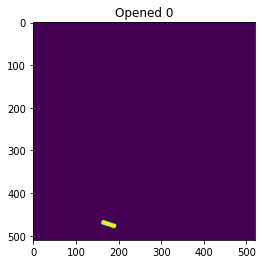

There are 2 blob/s
<bound method NDFrame.head of    area  perimeter  bbox-0  bbox-1  bbox-2  bbox-3  bbox_area  compactness  \
0   372  91.012193     463     159     483     195        720    22.266719   

   rectangularity  
0        0.516667  >


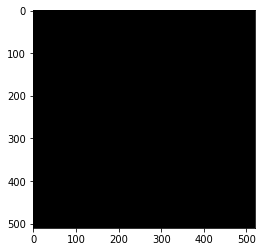

we need to rotate by 198.66081800574153 degree


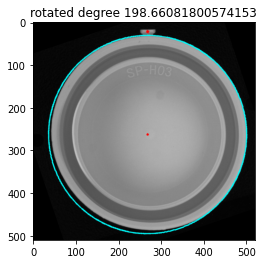

####################################################
image 1 has 1 circles
center has coordinate (251,242), radius = 231


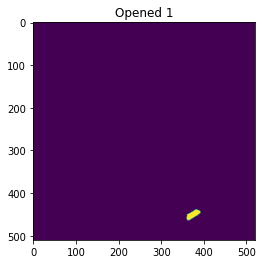

There are 2 blob/s
<bound method NDFrame.head of    area  perimeter  bbox-0  bbox-1  bbox-2  bbox-3  bbox_area  compactness  \
0   449  93.568542     438     359     464     393        884    19.499047   

   rectangularity  
0        0.507919  >


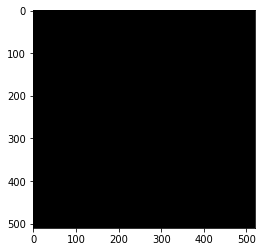

we need to rotate by 149.19855402386318 degree


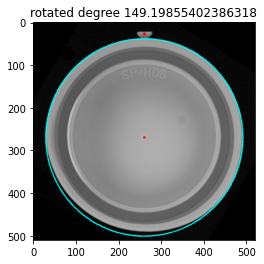

####################################################
image 2 has 1 circles
center has coordinate (260,245), radius = 234


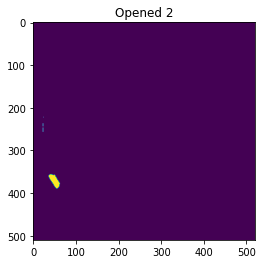

There are 5 blob/s
<bound method NDFrame.head of    area  perimeter  bbox-0  bbox-1  bbox-2  bbox-3  bbox_area  compactness  \
3   471  94.811183     356      36     390      63        918    19.085266   
0     1   0.000000     222      24     223      25          1     0.000000   
1     7   5.000000     237      23     244      24          7     3.571429   
2    10   8.000000     247      23     257      24         10     6.400000   

   rectangularity  
3        0.513072  
0        1.000000  
1        1.000000  
2        1.000000  >


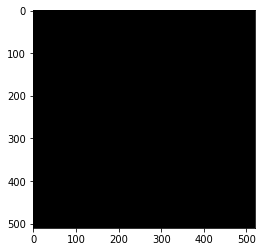

we need to rotate by 237.14024796027823 degree


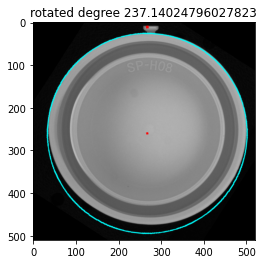

####################################################
image 3 has 1 circles
center has coordinate (247,239), radius = 233


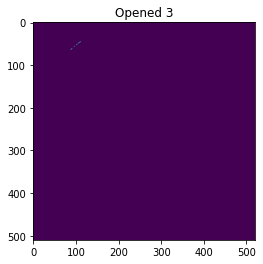

There are 5 blob/s
<bound method NDFrame.head of    area  perimeter  bbox-0  bbox-1  bbox-2  bbox-3  bbox_area  compactness  \
0     6   5.242641      45     106      50     112         30     4.580880   
3     4   2.828427      61      88      65      92         16     2.000000   
1     3   1.414214      51     101      54     104          9     0.666667   
2     2   0.000000      56      96      58      98          4     0.000000   

   rectangularity  
0        0.200000  
3        0.250000  
1        0.333333  
2        0.500000  >


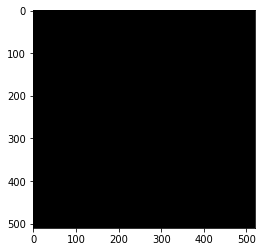

we need to rotate by 73.30075576600638 degree


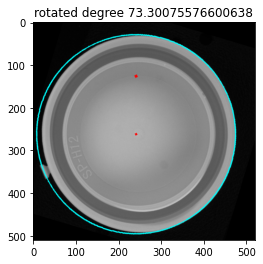

####################################################
image 4 has 1 circles
center has coordinate (251,245), radius = 231


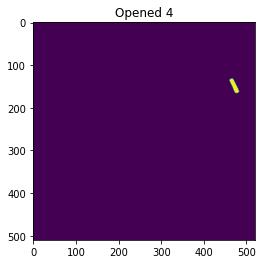

There are 2 blob/s
<bound method NDFrame.head of    area  perimeter  bbox-0  bbox-1  bbox-2  bbox-3  bbox_area  compactness  \
0   354  90.325902     132     460     167     483        805    23.047369   

   rectangularity  
0        0.439752  >


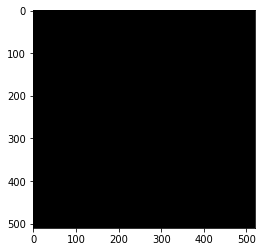

we need to rotate by 66.42529379808738 degree


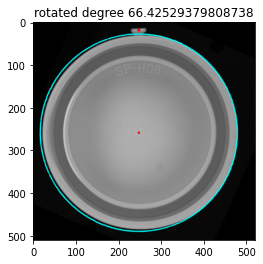

####################################################
image 5 has 1 circles
center has coordinate (250,251), radius = 231


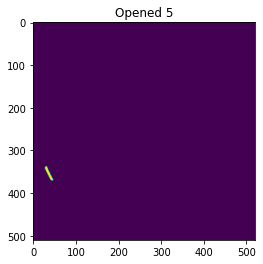

There are 2 blob/s
<bound method NDFrame.head of    area  perimeter  bbox-0  bbox-1  bbox-2  bbox-3  bbox_area  compactness  \
0   207  84.254834     337      28     371      48        680    34.294092   

   rectangularity  
0        0.304412  >


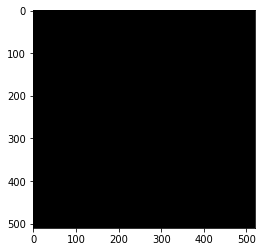

we need to rotate by 244.19307179074994 degree


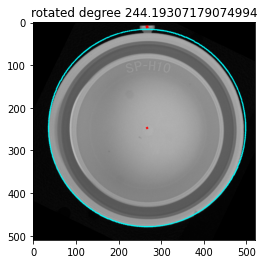

####################################################
image 6 has 1 circles
center has coordinate (257,244), radius = 231


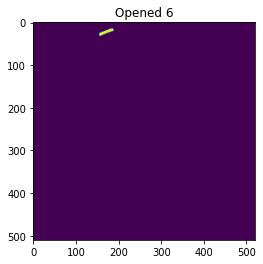

There are 2 blob/s
<bound method NDFrame.head of    area  perimeter  bbox-0  bbox-1  bbox-2  bbox-3  bbox_area  compactness  \
0   242  84.769553      15     155      33     189        612    29.693707   

   rectangularity  
0        0.395425  >


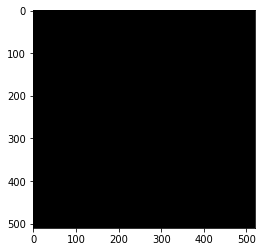

we need to rotate by -21.263015502461315 degree


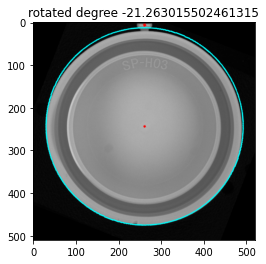

####################################################
image 7 has 1 circles
center has coordinate (251,248), radius = 231


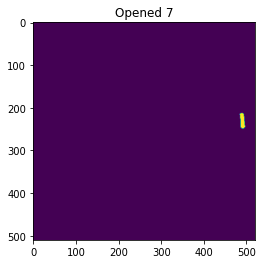

There are 2 blob/s
<bound method NDFrame.head of    area  perimeter  bbox-0  bbox-1  bbox-2  bbox-3  bbox_area  compactness  \
0   340  86.041631     213     484     250     497        481    21.774006   

   rectangularity  
0        0.706861  >


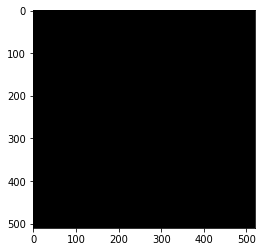

we need to rotate by 85.9314203231546 degree


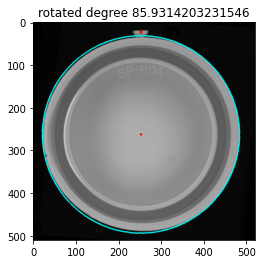

####################################################
image 8 has 1 circles
center has coordinate (245,245), radius = 231


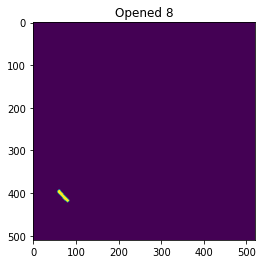

There are 2 blob/s
<bound method NDFrame.head of    area  perimeter  bbox-0  bbox-1  bbox-2  bbox-3  bbox_area  compactness  \
0   270  82.710678     392      57     422      85        840    25.337245   

   rectangularity  
0        0.321429  >


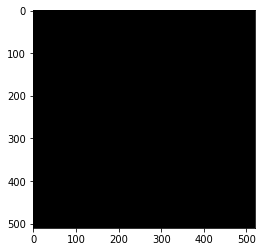

we need to rotate by 227.38594403038883 degree


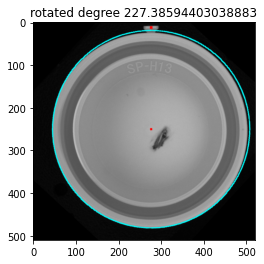

####################################################
image 9 has 1 circles
center has coordinate (259,248), radius = 234


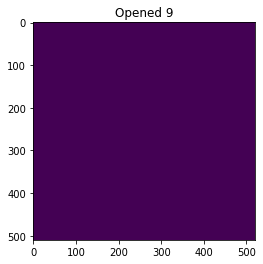

There are 1 blob/s


KeyError: -1

In [4]:
from skimage import measure
tabs = list()
rotated_images= list()
centers = list()
for i in range(0,len(cb_images)):
    focus = cb_images[i].copy()
    circles = find_best_circle(focus)
    print("image {} has {} circles".format(i,len(circles)))
    
    highlighted = cropped_images[i]
    tab = cv2.cvtColor(focus,cv2.COLOR_BGR2GRAY).copy()
    
    for (x,y,r) in  circles:
        x_center = x
        y_center = y
        centers.append((x,y,r))
        print("center has coordinate ({},{}), radius = {}".format(x,y,r))
        highlighted = cv2.circle(highlighted,(x,y),r,(0,255,255),2)
        highlighted = cv2.circle(highlighted,(x,y),1,(255,0,0),3) # adding the centre of the circle
        tab = cv2.circle(tab,(x,y),r+2,(0,0,0),-1)
    

    ## da decommentare per salvare le immagini. 
    # cv2.imwrite("highlighted_{}.png".format(i),highlighted_focus)
    # plt.imshow(tab, cmap="gray")
    # plt.show()

    edges = cv2.Canny(tab,threshold1=90,threshold2=80)

    tab = cv2.threshold(tab,20,255, type = cv2.THRESH_BINARY,)[1]

    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
    opened= cv2.morphologyEx(tab, cv2.MORPH_OPEN,kernel,-1)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(4,4))
    opened = cv2.morphologyEx(opened,cv2.MORPH_ERODE,kernel,-1)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))
    opened = cv2.morphologyEx(opened,cv2.MORPH_CLOSE,kernel,-1)


    plt.imshow(opened)
    plt.title("Opened {}".format(i))
    plt.show()

    labels = measure.label(opened)
    
    # print("labels ={}".format(labels))# never decomment this 
    print("There are {} blob/s".format(len(np.unique(labels))))

    properties =['area','perimeter','bbox','bbox_area',
                # 'convex_area',
            # 'major_axis_length', 'minor_axis_length',
            # 'eccentricity'
            ]
    df = pd.DataFrame(regionprops_table(labels, properties = properties))
    df["compactness"]= df["perimeter"]**2/df["area"]
    
    df["rectangularity"] = df["area"]/df["bbox_area"]
        
    if len(np.unique(labels))!= 1:
        df=df.sort_values(['rectangularity',"area",'compactness'])
        print(df.head);
        indexes = list(df.index.values)
        best = indexes[0]

        labels[labels==best]=255
        labels[labels!=best]=0

        plt.imshow(labels,cmap="gray")
        plt.show()

        area = df["area"][best]
        # opened= labels.copy()
    area =df["area"][len(df["area"])-1]

    # plt.imshow(tab,cmap="gray")
    # plt.title("tab {}".format(i))
    # plt.show()
    (x_tab,y_tab) = compute_centroid(opened,x,y,area)

    
    angle = compute_rotation_angle(x_tab-x_center,y_tab-y_center)
    

    print("we need to rotate by {} degree".format(angle))    
    cv2.circle(tab,(x_tab,y_tab),1,(0,0,0),10) # adding the barycenter of the centroid
    
    highlighted = cv2.circle(highlighted,(x_tab,y_tab),2,(255,0,0),3)
    rotated_image= rotate(highlighted,angle)

    plt.imshow(rotated_image)
    plt.title("rotated degree {}".format(angle))
    plt.show()
    rotated_images.append(rotated_image)

    cv2.circle(tab,(x, y),1,(255,255,255),10)
    print("####################################################")

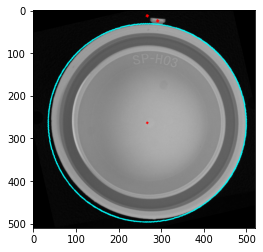

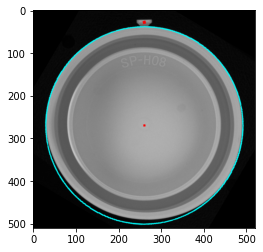

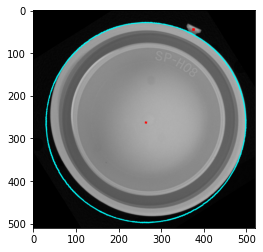

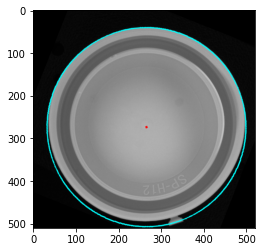

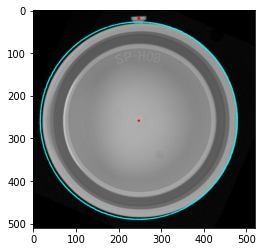

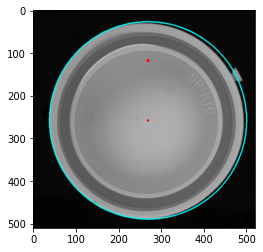

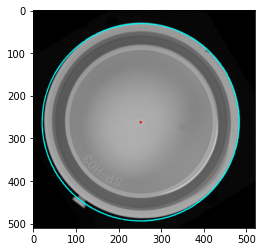

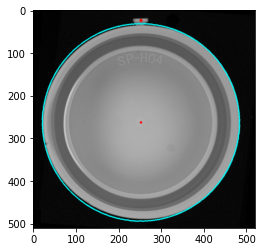

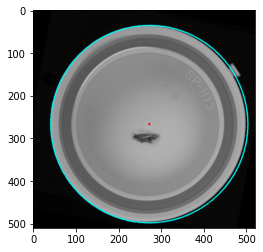

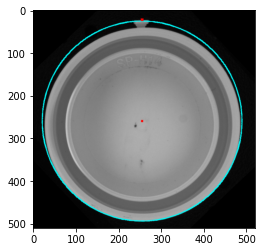

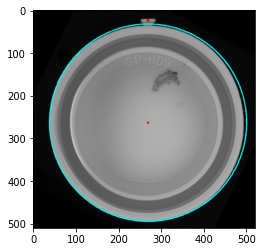

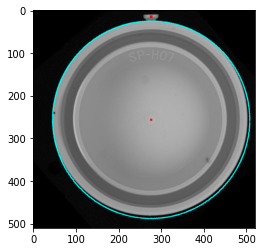

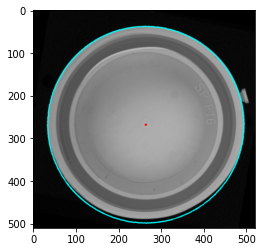

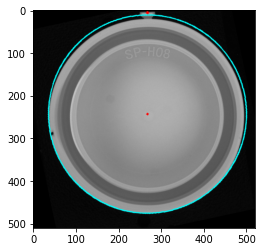

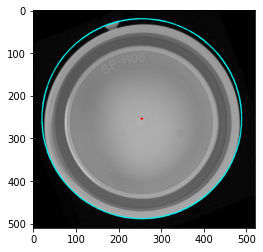

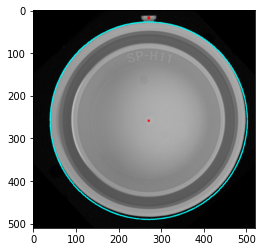

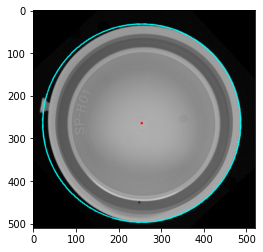

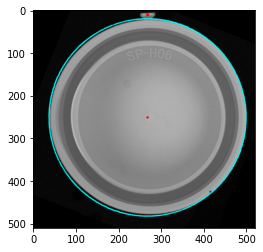

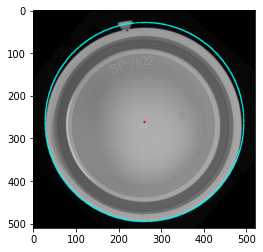

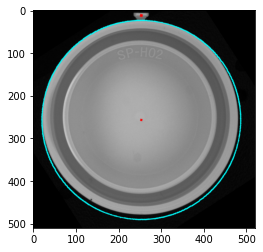

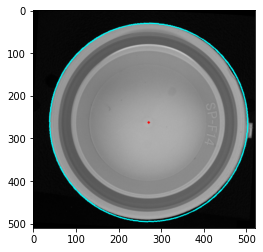

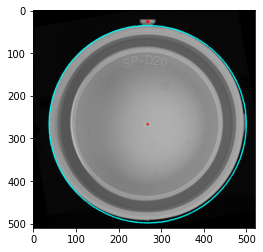

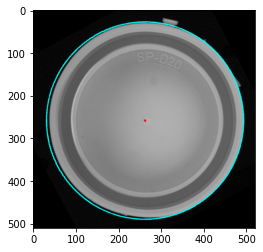

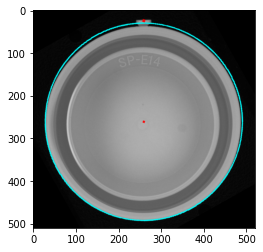

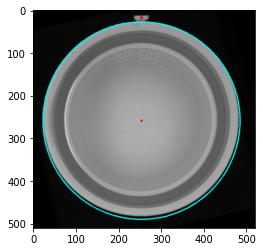

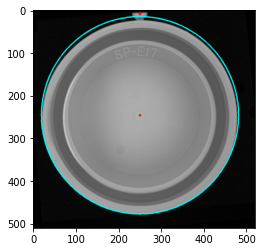

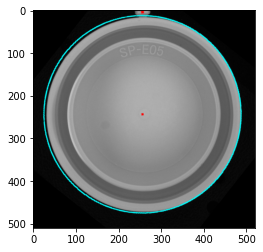

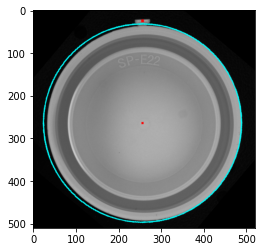

In [18]:
for image in rotated_images:
    plt.imshow(image)
    plt.show()

the center is (254,244)


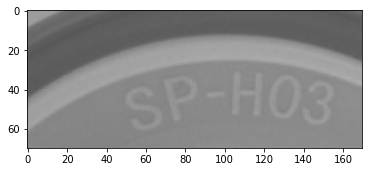

the center is (251,242)


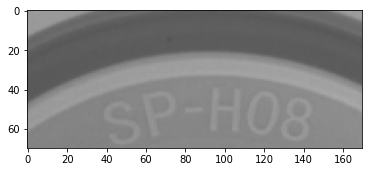

the center is (260,245)


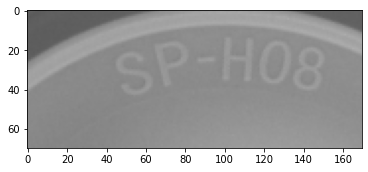

the center is (247,239)


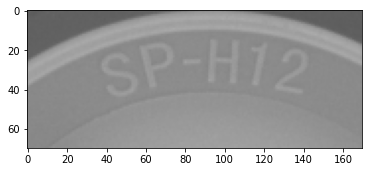

the center is (251,245)


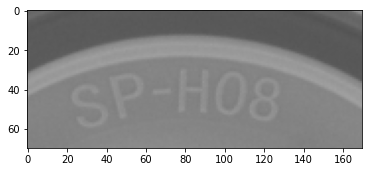

the center is (250,251)


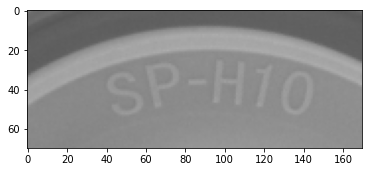

the center is (257,244)


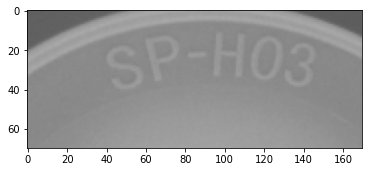

the center is (257,248)


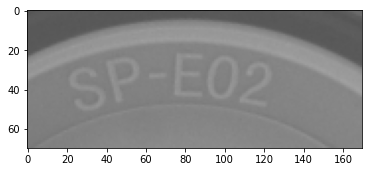

the center is (251,245)


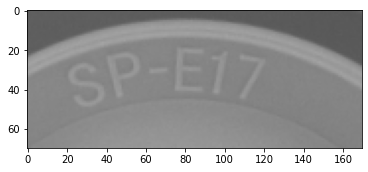

the center is (250,248)


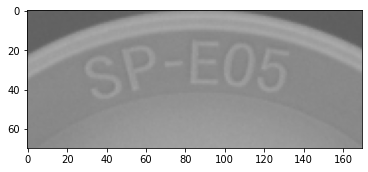

the center is (256,245)


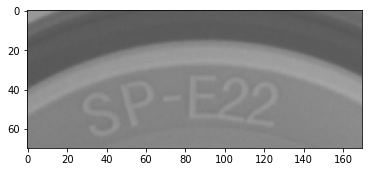

In [21]:
cavity_numbers = list()
for i in range(len(rotated_images)):
    image = rotated_images[i]
    (x,y,r) = centers[i]
    print("the center is ({},{})".format(x,y))
    delta_x = 35
    x-=150
    delta_y = 75
    # x-delta_x:x+delta_x
    # y-=20
    # y-delta_y:y+delta_y
    cavity_number = image[x-delta_x:x+delta_x, y-delta_y:y+delta_y+20].copy()

    cavity_numbers.append(cavity_number)
    plt.imshow(cavity_number)
    plt.show()



In [20]:
import math

for i in range (len(cavity_numbers)):
    (x,y,r)= centers[i]
    image = cavity_numbers[i]

    res = polar_transform(image,(x,y))

    plt.imshow(res)
    plt.show()
    # polarImage = cavity_numbers[i]  cartesian = warp_polar(polarImage, center=(x,y),radius=r, multichannel=True)
    
    # cartesian = warp_polar(polarImage, center=(x,y),radius=r, multichannel=True)
    

    # # plt.figure()
    # # plt.imshow(polarImage, origin='lower')

    # plt.figure()
    # plt.imshow(cartesian)
    # plt.show()

x= 165.353684909189
y= -297.3199604583464


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices